# Part 1: Linear Regression

**Research Question :** What is the influence of the Age (Continuous variable), Pdays(Discrete variable) and Job(Discrete variable) values on the Duration value (Continuous variable) ?

Let's record the signification of our variables:


*   Age: Age of the client
*   Pdays: Number of days that passed by after the client was last contacted from a previous campaign
*   Job: Profession of the client
*   Duration: Last contact duration, in seconds



*Importation and representation of the data* 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv("bank-additional-full.csv",delimiter=';')

In [2]:
filter1 = data['housing'] != 'unknown'
filter2= data['loan'] != 'unknown'
filter3 = data['education'] != 'unknown'
filter4 = data['job'] != 'unknown'
filter5 = data['default'] != 'unknown'

temp = data.where(filter1&filter2&filter3&filter4&filter5)
dow = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}
mon = {"may":5,"jun":6,"jul":7,"aug":8,"oct":10,"nov":11,"dec":12,"mar":3,"apr":4,"sep":9}
temp = temp.dropna()
temp['education'] = temp.apply(lambda x: x['education'] in ['professional.course','university.degree'],axis=1)
temp['marital'] = temp.apply(lambda x:x['marital'] =='married',axis=1)
temp['poutcome'] = temp.apply(lambda x:x['poutcome'] =='success',axis=1)
temp['day_of_week'] = temp.apply(lambda x:dow[x['day_of_week']] ,axis=1)
temp['month'] = temp.apply(lambda x:mon[x['month']] ,axis=1)
temp['default'] = temp.apply(lambda x:x['default']=="yes" ,axis=1)
temp['housing'] = temp.apply(lambda x:x['housing']=="yes" ,axis=1)
temp['loan'] = temp.apply(lambda x:x['loan']=="yes" ,axis=1)
temp['y'] = temp.apply(lambda x:x['y']=="yes" ,axis=1)

#dropping unwanted columns
temp = temp.drop('contact', inplace=False, axis=1)
"""
temp = temp.drop('duration', inplace=False, axis=1)
temp = temp.drop('emp.var.rate', inplace=False, axis=1)
temp = temp.drop('cons.price.idx', inplace=False, axis=1)
temp = temp.drop('cons.conf.idx', inplace=False, axis=1)
temp = temp.drop('euribor3m', inplace=False, axis=1)
temp = temp.drop('nr.employed', inplace=False, axis=1)
"""
data = temp
#data

In [3]:
data = data[["age","duration","pdays","job"]]
temp_data = data[data["pdays"]!= 999]
temp_data

,age,duration,pdays,job
24108,37.0,119.0,6.0,admin.
24264,48.0,112.0,4.0,management
24482,36.0,200.0,4.0,self-employed
24613,32.0,1091.0,5.0,blue-collar
24799,31.0,290.0,5.0,entrepreneur
...,...,...,...,...
41163,35.0,385.0,4.0,technician
41164,54.0,1868.0,10.0,admin.
41174,62.0,208.0,1.0,retired
41178,62.0,483.0,6.0,retired


Data sample of size 200:

In [4]:
data_sample = temp_data.sample(200,random_state=1)
data_sample

,age,duration,pdays,job
40040,30.0,255.0,3.0,admin.
40674,27.0,404.0,6.0,technician
40014,60.0,395.0,4.0,management
40723,53.0,404.0,3.0,management
36167,26.0,161.0,3.0,self-employed
...,...,...,...,...
30423,57.0,374.0,2.0,retired
40184,26.0,806.0,6.0,technician
39233,25.0,436.0,6.0,unemployed
41132,41.0,597.0,3.0,unemployed


**Representation and first Analysis of our data sample**

In [5]:
def build_boxplot(data,ver = True):
    plt.boxplot(data,vert=ver)
def desc(data):
    print(data.describe())

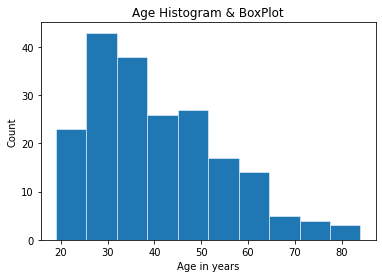

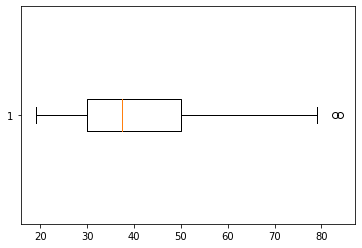

In [6]:
fig, ax = plt.subplots()
ax.hist(data_sample['age'], linewidth=0.5, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Age in years", title="Age Histogram & BoxPlot")
plt.show()
build_boxplot(data_sample['age'],ver = False)
plt.show()

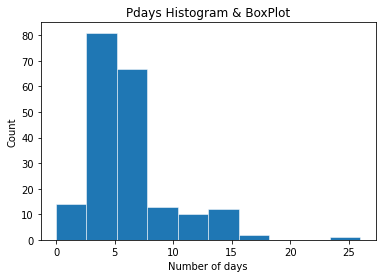

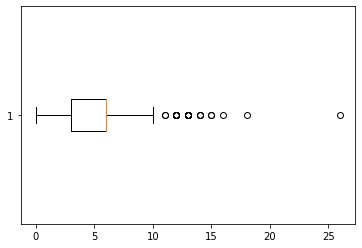

In [7]:
fig, ax = plt.subplots()
ax.hist(data_sample['pdays'], linewidth=0.5, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Number of days", title="Pdays Histogram & BoxPlot")
plt.show()
build_boxplot(data_sample['pdays'],ver = False)
plt.show()

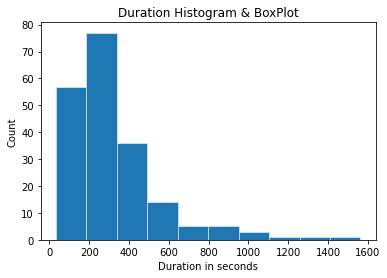

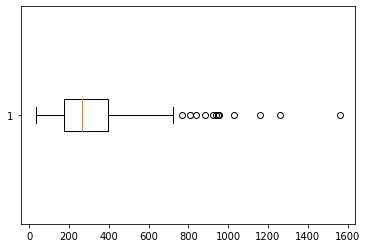

In [8]:
fig, ax = plt.subplots()
ax.hist(data_sample['duration'], linewidth=0.5, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Duration in seconds", title="Duration Histogram & BoxPlot")
plt.show()
build_boxplot(data_sample['duration'],ver = False)
plt.show()

In [9]:
data_sample['job'].value_counts()

admin.           67
technician       29
management       17
student          17
retired          16
blue-collar      14
services         12
unemployed       11
self-employed    10
entrepreneur      4
housemaid         3
Name: job, dtype: int64

Based on our graphs, we note that the distribution of our variables is not symetric.
Moreover, we can state a hypothesis on the distribution of our variables: The duration variable seems to come from an Exponential Dustribution and the Age and Pdays variables seems to come from a Normal Distribution.

From this , we can infer that the reason we have unusual data is because the unusual is the long - tail of each distribution. in fact , its clear on the bars plot \
we removed the data thet satisfies pday = 999 , because it means no data. we got less data , but its enougth to work with

**Graphs of each of our explanatory variables(continuous variables) in regard to our explained variable (Duration variable in our case)**

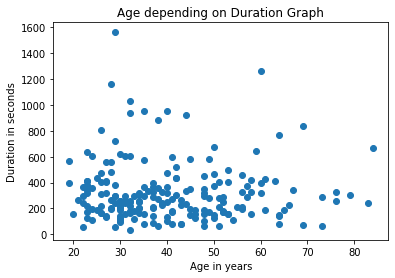

In [10]:
plt.plot(data_sample['age'], data_sample['duration'],linestyle = "",marker = "o")
plt.title("Age depending on Duration Graph")
plt.xlabel("Age in years")
plt.ylabel("Duration in seconds")
plt.show()

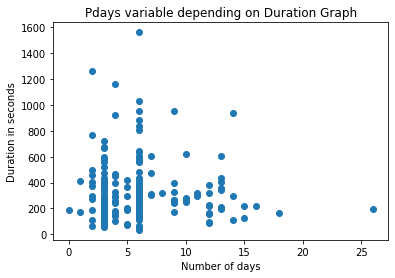

In [11]:
plt.plot(data_sample['pdays'], data_sample['duration'],linestyle = "",marker = "o")
plt.title("Pdays variable depending on Duration Graph")
plt.xlabel("Number of days")
plt.ylabel("Duration in seconds")
plt.show()

With regard to our obtained graphs, we can say that the older the people, the less they have a duration value high.
Moreover, we note that the majority of our Duration values are not higher that 800 seconds.
Considering the Pdays variable, we note that the more the days pass(number of days higher), the less the duration is high, see, almost non-existent.


We conclude, based on these graphs that the Age variable seems to have a more important impact on our Duration value that the Pdays variable.

In [12]:
df = pd.DataFrame(data_sample, columns = ['job','duration','age','pdays'])
jobs = df['job'].unique()
a = df.groupby(['job']).median().sort_values(['duration']).reset_index()
a= a['job'].to_numpy()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d7645dee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d7649a4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d7645dac0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f4d7649abb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d7649aeb0>,
 'means': []}

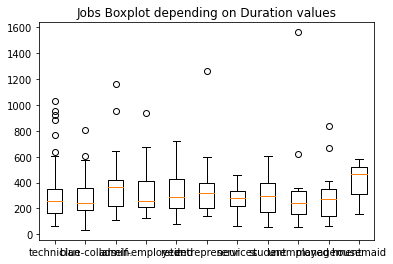

In [13]:
dist_jobs = df['job'].unique()
X = [df[df['job']==x]['duration'] for x in dist_jobs]
plt.title("Jobs Boxplot depending on Duration values")
plt.boxplot(X,labels = a)

Calculation of the Beta Hat vector:

In [14]:
job_to_index = {}
for i,j in enumerate(a):
  job_to_index[j] = i
df['temp'] = df.apply(lambda y : job_to_index[y['job']],axis = 1)

In [15]:
X = df[['temp','age','pdays']].to_numpy()
X = np.hstack((np.ones((len(df.index),1)),X))
Y = df['duration'].to_numpy()
beta_hat = np.linalg.inv(X.T@X)@X.T@Y
print("Beta hat values based on our sample are:", beta_hat)

Beta hat values based on our sample are: [317.19568028   8.33439449  -0.46539474  -1.06261204]


Based on the beta hat values that we obtained we conclude that the augmentation of one unit of the temp variable(=change of job) adds 8.33439449 to the value of the Duration variable. Likewise, the augmentation of one unit of the age variable reduces of 0.46539474 the value of the duration variable and the augmentation of one unit of the pdays variable (=augmentation of one day) reduces 1.06261204 to the value of the duration variable.

**Calculations for the ANOVA table:**

In [16]:
P = X@np.linalg.inv(np.matmul(X.T,X))@X.T

In [17]:
p = len(beta_hat)
P_big = X@np.linalg.inv(X.T@X)@X.T
k=p-1
n=len(data)
SSE = Y.T @(np.identity(200)-P_big)@Y
sigma_data = SSE/196
print("MSE of sigma squared is ",sigma_data)

MSE of sigma squared is  53680.261524258916


In [18]:
y_hat = [x.T@beta_hat for x in X]

In [19]:
def Sum_of_Squares(vec1,vec2):
    if len(vec1) != len(vec2):
        return -1
    return sum([(a-b)**2 for a,b in zip(vec1,vec2)])

def mseNum(vec1,x):
    return sum([(a-x)**2 for a in vec1])

def f(x,vec,toadd1 = False):
    """
        return applying vec on vec as a linear function
        x first value must be 1 , or make toadd1 True
        we can do X_T*vec but I dont want to check conversion to numpy
    """
    if toadd1:
        x = np.insert(x,0,1)
    return sum([a*b for a,b in zip(x,vec)])


In [20]:
SSr = mseNum(beta_hat,np.average(Y))
SSt = mseNum(Y,np.average(Y))

In [21]:
from scipy.stats import f as f_stat
alpha = 0.001
MSr = SSr/k
MSe = SSE/(n-p)
MSt = SSt/(n-1)
F = MSr/MSe


In [22]:
anova_table = pd.DataFrame({"Source":["Regression","Residuals","Total"],
                            "Sum of Squares":[SSr,SSE,SSt],
                            "df":[k,n-p,n-1],
                            "MS":[SSr/k,SSE/(n-p),SSt/(n-1)],
                            "F":[F,np.NaN,np.NaN]})
anova_table 

,Source,Sum of Squares,df,MS,F
0,Regression,3.073896e+05,3,102463.198943,297.446531
1,Residuals,1.052133e+07,30543,344.476026,NaN
2,Total,1.065444e+07,30546,348.799839,NaN


In [23]:
print("The Statistical value for the F test is:", F)
print("We would like to check if our value of the T.S higher than ",f_stat(k,n-p).cdf(1-alpha))
print ("Do we reject H0 ?", F > f_stat(k,n-p).cdf(1-alpha))

The Statistical value for the F test is: 297.44653108500114
We would like to check if our value of the T.S higher than  0.6078969309398511
Do we reject H0 ? True


In [24]:
R = SSr / SSt
R_adj = 1-((n-1)/(n-p))*(1-R)
print("The R squared value is ",R," and the R_adj value is ",R_adj)

The R squared value is  0.028850845322235197  and the R_adj value is  0.02875545693654835


**Calculation of the vector Beta hat with regard to the original data**

In [25]:
df2 = pd.DataFrame(temp_data, columns = ['job','age','pdays','duration'])
df2['temp'] = df2.apply(lambda y : job_to_index[y['job']],axis = 1)

In [26]:
X2 = df2[['temp','age','pdays']].to_numpy()
X2 = np.hstack((np.ones((len(df2.index),1)),X2))
Y2 = df2['duration'].to_numpy()
beta_hat2 = np.linalg.inv(X2.T@X2)@X2.T@Y2
print("Beta hat values based on our original data are:", list(beta_hat2))

Beta hat values based on our original data are: [287.4511818865229, -0.2499494173885387, 0.10481117002944884, 4.320336899884561]


**Calculation of the confidence intervals of our Beta values based on our data sample and comparaison with the values obtained from our original data:**

In [27]:
dict_b = {}
sigma_data = SSE/196
C = np.linalg.inv(X.T@X)
for i in range(4):
  print(" For beta",i,"CI is:")
  dict_b[i] = [beta_hat[i] - 2*np.sqrt(sigma_data*C[i][i]),beta_hat[i] + 2*np.sqrt(sigma_data*C[i][i])]
  print(dict_b[i])

 For beta 0 CI is:
[186.57323338410663, 447.8181271728637]
 For beta 1 CI is:
[-2.822088026536422, 19.490876999756722]
 For beta 2 CI is:
[-2.8426552537701157, 1.9118657661750929]
 For beta 3 CI is:
[-10.266015132186762, 8.140791060168315]


In [28]:
for i in range(4):
  print("Is beta",i ,"obtained from the original data is in our CI ? ")
  print((beta_hat2[i]>dict_b[i][0])&(beta_hat2[i] < dict_b[i][1]))

Is beta 0 obtained from the original data is in our CI ? 
True
Is beta 1 obtained from the original data is in our CI ? 
True
Is beta 2 obtained from the original data is in our CI ? 
True
Is beta 3 obtained from the original data is in our CI ? 
True


**Statistical Test:**\
*Hypothesis:* \
  H0 : All the Beta values == 0\
  H1: There is at least one beta value != 0


In [29]:
#F is calculated from cell 21
print("The value of the T.S for the F test is:",F)
print("We would like to check if our value of the T.S higher than ",f_stat(k,n-p).cdf(1-alpha))
print ("Do we reject H0?", F > f_stat(k,n-p).cdf(1-alpha))
pv = 1-f_stat.cdf(F,k,n-p)
print("The p-value is :",pv)

The value of the T.S for the F test is: 297.44653108500114
We would like to check if our value of the T.S higher than  0.6078969309398511
Do we reject H0? True
The p-value is : 1.1102230246251565e-16


**Representation of residuals graphs:**

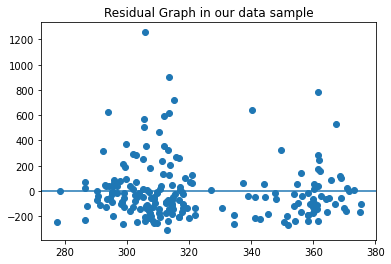

In [30]:
y_res = Y-y_hat
y_res_tag = [(a,b) for a,b in zip(y_res,y_hat)]
y_res_tag.sort(key = lambda x: x[1])
y_res_tag = [a[0] for a in y_res_tag]
plt.plot(y_hat,y_res_tag,linestyle = "",marker = "o")
plt.axhline(y=0)
plt.title("Residual Graph in our data sample")
plt.show()

Based on the graph we received, we deduce that our graph is Heteroscedastic (ההנחה של שוויון שונויות לא סבירה) and Biased.\
Thus, we conclude that it is not likely that the distribution of the "noise" of our data come from Normal Distribution.

**New data sample of size 1000(with different data than in our precedent sample):**

In [31]:
df3 = temp_data.sample(1200,random_state=33)
df3 = pd.concat([df3,data_sample]).drop_duplicates(keep=False).head(1000)

In [32]:
df3['temp'] = df3.apply(lambda y : job_to_index[y['job']],axis = 1)
X3 = df3[['temp','age','pdays']].to_numpy()
X3 = np.hstack((np.ones((len(df3.index),1)),X3))
Y3 = df3['duration'].to_numpy()

**Prediction of our new data given X_new:**

In [34]:
beta_hat3 = np.linalg.inv(X3.T@X3)@X3.T@Y3
y3_pred = beta_hat @ X3.T
for i in range(1000):
  print("Prediction given X_new_",i,"is:")
  print(y3_pred[i])

Prediction given X_new_ 0 is:
291.2035017243794
Prediction given X_new_ 1 is:
319.9026269377801
Prediction given X_new_ 2 is:
360.7681693754104
Prediction given X_new_ 3 is:
374.2565852968427
Prediction given X_new_ 4 is:
291.2035017243794
Prediction given X_new_ 5 is:
359.56570314229145
Prediction given X_new_ 6 is:
311.5799539430446
Prediction given X_new_ 7 is:
289.2181318494708
Prediction given X_new_ 8 is:
315.4349344418389
Prediction given X_new_ 9 is:
297.25363339374707
Prediction given X_new_ 10 is:
318.9563427452499
Prediction given X_new_ 11 is:
306.3523155664886
Prediction given X_new_ 12 is:
312.90621107588225
Prediction given X_new_ 13 is:
320.3525269766424
Prediction given X_new_ 14 is:
359.185730201984
Prediction given X_new_ 15 is:
311.2699081012921
Prediction given X_new_ 16 is:
346.1973882773988
Prediction given X_new_ 17 is:
356.9478681296656
Prediction given X_new_ 18 is:
341.3849706866556
Prediction given X_new_ 19 is:
360.5856042765556
Prediction given X_new_ 20 i

**Calculations of the confidence Interval for each point:**

In [35]:
C3 = np.linalg.inv(X3.T@X3)
e = [a-b for a,b in zip(Y3,y3_pred)]
n = len(df3.index)
sigma_3 = sum(a**2 for a in e) / (n-4)

In [37]:
CI_1000 = {}
rr = range(n)
for x,y,i in zip(X3,y3_pred,rr):
  var_for_ci = 2*np.sqrt(sigma_3*(x@C3@x.T+1))
  CI_1000[i] = (y-var_for_ci,y+var_for_ci)

for i in range(1000):
  print("Confidence Interval for data point",i,"is:")
  print(CI_1000[i])


Confidence Interval for data point 0 is:
(-218.31272512274415, 800.719728571503)
Confidence Interval for data point 1 is:
(-189.87068132687529, 829.6759352024355)
Confidence Interval for data point 2 is:
(-149.21098568293957, 870.7473244337605)
Confidence Interval for data point 3 is:
(-135.89386383718687, 884.4070344308723)
Confidence Interval for data point 4 is:
(-218.31272512274415, 800.719728571503)
Confidence Interval for data point 5 is:
(-150.59852683205906, 869.729933116642)
Confidence Interval for data point 6 is:
(-198.29138910763652, 821.4512969937257)
Confidence Interval for data point 7 is:
(-220.4358578383575, 798.8721215372991)
Confidence Interval for data point 8 is:
(-194.0832869242455, 824.9531558079233)
Confidence Interval for data point 9 is:
(-212.20099156182215, 806.7082583493163)
Confidence Interval for data point 10 is:
(-190.5369790325517, 828.4496645230515)
Confidence Interval for data point 11 is:
(-203.06674699758457, 815.7713781305617)
Confidence Interval 

In [38]:
prob = 0
for i in range(1000):
  if (Y3[i] >= CI_1000[i][0]) and (Y3[i] <= CI_1000[i][1]):
    prob +=1

prob /= 1000
print("The percentage of confidence intervals that contains the real values of Y_new is:",prob)

The percentage of confidence intervals that contains the real values of Y_new is: 0.957


We note that the percentage obtained is close to 95%. It proves the validation of our confidence intervals that we built.

**Addition of variables in our models and calculation of their beta hat vector**

In [39]:
z12 = [x[1]*x[2] for x in X2]
z13 = [x[1]*x[3] for x in X2]
z23 = [x[2]*x[3] for x in X2]

X4 = [np.hstack((a,b,c,d)) for a,b,c,d in zip(X2,z12,z13,z23)]

In [40]:
X4 = np.array(X4)
beta_hat4 = np.linalg.inv(X4.T@X4)@X4.T@Y2
print("Beta hat values based on our data are:", beta_hat)

Beta hat values based on our data are: [317.19568028   8.33439449  -0.46539474  -1.06261204]


**Comparaison of our models:**

**First method:** With the use of R_square and R_adj calculations

In [41]:
y4_pred = beta_hat4@X4.T
SSt = mseNum(Y2,np.mean(Y2))
SSr = mseNum(y4_pred,np.mean(Y2))
R = SSr / SSt
R_adj = 1-((1000-1)/(1000-7))*(1-R)
print("R squared value is ",R," and R_adj value is ",R_adj)

R squared value is  0.0068195712748816955  and R_adj value is  0.0008184810711044932


**Second method:** With the analysis of the residuals (Use of residuals graph)

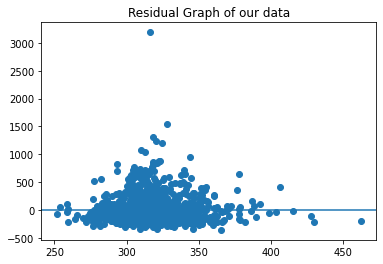

In [42]:
y4_res = Y2-y4_pred
y4_res_tag = [(a,b) for a,b in zip(y4_res,y4_pred)]
y4_res_tag.sort(key = lambda x: x[1])
y4_res_tag = [a[0] for a in y4_res_tag]
plt.plot(y4_pred,y4_res_tag,linestyle = "",marker = "o")
plt.axhline(y=0)
plt.title("Residual Graph of our data")
plt.show()

Based on our metrics, we can conclude that this second model (using Z12,Z13, Z23 variables) is better than the first one (R_Square and R_adj values lower and residual graph almost homoscedastic and unbiased) 

# Part 2: Logistic Regression

**Research Question :** What is the influence of the Age (Continuous variable), Month(Discrete variable) and Nr.employed(Discrete variable) values on the y variable (Binary variable) ?

Let's record the signification of our variables:


*   Age: Age of the client
*   Month: Last contact month of year of the current campaign
*   Nr.employed: Number of employees 
*   y: Yes if the client will subscribe a term deposit or no otherwise

In [43]:
df_part2 = temp[['month','age','nr.employed','y']]

**Data sample of size 200:**

In [44]:
data_sample_200 = df_part2.sample(200)

Our new variables are: Month, Nr.employed that are discrete variables, and y that is a binary variable.

In [45]:
data_sample_200['nr.employed'].value_counts()

5228.1    70
5099.1    51
5191.0    35
5195.8    19
4963.6     7
5017.5     7
5076.2     6
5008.7     2
4991.6     2
5023.5     1
Name: nr.employed, dtype: int64

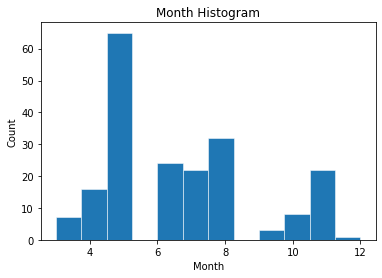

In [46]:
fig, ax = plt.subplots()
ax.hist(data_sample_200['month'],bins = 12, linewidth=0.5, edgecolor="white")
ax.set(ylabel="Count", xlabel= "Month", title="Month Histogram")
plt.show()

In [47]:
data_sample_200['month'].value_counts()

5     65
8     32
6     24
7     22
11    22
4     16
10     8
3      7
9      3
12     1
Name: month, dtype: int64

In [48]:
data_sample_200['y'].value_counts()

False    179
True      21
Name: y, dtype: int64

Based on these data, our variables doesn't seems to come from a symetric distribution.

We note that we don't have data from all possible month.

**Graphs of each of our continuous variables in regard to our "y" value:**

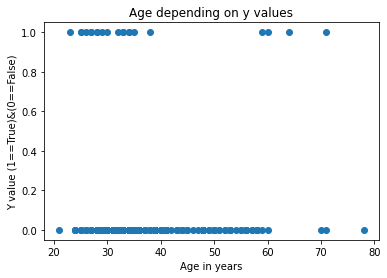

In [49]:
plt.plot(data_sample_200['age'], data_sample_200['y'] ,linestyle = "",marker = "o")
plt.title("Age depending on y values")
plt.xlabel("Age in years")
plt.ylabel("Y value (1==True)&(0==False)")
plt.show()

We note that in our selection we just have one continuous variable and therefore we can't compare the influence of our all variables in our explained variable(y).

**Calculation of Beta Hat vector:**

In [50]:
X_data = data_sample_200[['month','age','nr.employed']]
Y_data = data_sample_200['y']


In [51]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression()
regressor.fit(X_data, Y_data)
coef = regressor.coef_
intercept = regressor.intercept_

In [52]:
beta_hat_logistic = np.concatenate((intercept, coef),axis=None)

In [53]:
for i,b in enumerate(beta_hat_logistic):
  print("beta hat",i,"value is:", b)

beta hat 0 value is: 0.003250439783065877
beta hat 1 value is: 0.042972233577864775
beta hat 2 value is: -0.019678941366706844
beta hat 3 value is: -0.00033091515314034056


Based on the beta hat values that we obtained we conclude that the augmentation of one unit of the month variable adds 0.042972233577864775 to the value of the y variable. Likewise, the augmentation of one unit of the age variable reduce of 0.019678941366706844 the value of the y variable and the augmentation of one unit of the nr.employed variable reduces of 0.00033091515314034056 the value of the y variable.

In [54]:
def sig(x):
    return (np.exp(x))/(1+np.exp(x))
def logit(x):
    return np.log(x/(1-x))

In [55]:
def pi(i,beta:np.array,x:np.array):
    return sig(beta_hat_logistic.T@x)

In [56]:
X_data3 = X_data.to_numpy()
X_data3 = np.hstack((np.ones((len(data_sample_200.index),1)),X_data3))

In [57]:
V = np.diag([pi(i,beta_hat_logistic,x) for i,x in enumerate(X_data3)])

In [58]:
C = np.linalg.inv(X_data3.T@V@X_data3)

**Calculations of the confidence intervals for the Beta values:**

In [59]:
CI_dict = {}
for i,b in enumerate(beta_hat_logistic):
    print("CI for beta",i,"is:")
    CI = [b-2*np.sqrt(C)[i][i],b+2*np.sqrt(C)[i][i]]
    print("[",CI[0]," , ",CI[1],"]")
    CI_dict[i] = CI
    

CI for beta 0 is:
[ -29.105995706251097  ,  29.11249658581723 ]
CI for beta 1 is:
[ -0.14811589089444402  ,  0.23406035805017358 ]
CI for beta 2 is:
[ -0.06521552699790878  ,  0.0258576442644951 ]
CI for beta 3 is:
[ -0.006009624794432314  ,  0.005347794488151632 ]


<ipython-input-59-f182bd93973f>:4: RuntimeWarning: invalid value encountered in sqrt
  CI = [b-2*np.sqrt(C)[i][i],b+2*np.sqrt(C)[i][i]]


Based on our original data we obtained the followed vector:

In [60]:
X_all = temp[['month','age','nr.employed']]
Y_all = temp['y']

In [61]:
regressor = LogisticRegression()
regressor.fit(X_all, Y_all)
coef2 = regressor.coef_
intercept2 = regressor.intercept_

In [62]:
beta_hat_logistic_all = np.concatenate((intercept2, coef2),axis=None)

In [63]:
for i,b in enumerate(beta_hat_logistic_all):
  print("beta hat",i,"value is:", b)

beta hat 0 value is: 0.003391638981487634
beta hat 1 value is: 0.05177479919734824
beta hat 2 value is: 0.01719715757861041
beta hat 3 value is: -0.0005787923128369465


In [64]:
for i in range(4):
  print("Is beta",i ,"obtained from the original data is in our CI ? ")
  print((beta_hat_logistic_all[i]>CI_dict[i][0])&(beta_hat_logistic_all[i] < CI_dict[i][1]))

Is beta 0 obtained from the original data is in our CI ? 
True
Is beta 1 obtained from the original data is in our CI ? 
True
Is beta 2 obtained from the original data is in our CI ? 
True
Is beta 3 obtained from the original data is in our CI ? 
True


**Addition of variables in our models and calculation of their beta hat vector**

In [65]:
Z12 = [x[1]*x[2] for x in X_data3]
Z13 = [x[1]*x[3] for x in X_data3]
Z23 = [x[2]*x[3] for x in X_data3]

X_data_2model = np.array([np.hstack((a,b,c,d)) for a,b,c,d in zip(X_data3,z12,z13,z23)])

In [67]:
X_data3[0]

array([1.000e+00, 5.000e+00, 3.800e+01, 5.191e+03])

In [66]:
regressor = LogisticRegression(fit_intercept=False)
regressor.fit(X_data_2model, Y_data)
coef = regressor.coef_
intercept = regressor.intercept_

In [71]:
beta_hat_logistic2 = coef[0]
#beta_hat_logistic2

array([ 0.00320116,  0.03094398, -0.01313431, -0.00050166,  0.00233835,
        0.00752373,  0.0008224 ])

In [72]:
for i,b in enumerate(beta_hat_logistic2):
  print("beta hat",i,"value is:", b)

beta hat 0 value is: 0.0032011554417301015
beta hat 1 value is: 0.03094397560252042
beta hat 2 value is: -0.013134306299925434
beta hat 3 value is: -0.000501656115016997
beta hat 4 value is: 0.002338347114828447
beta hat 5 value is: 0.007523734971242914
beta hat 6 value is: 0.0008223965727439521


In [ ]:
#X_data_2model[0]

array([1.0000e+00, 6.0000e+00, 4.0000e+01, 5.2281e+03, 7.4000e+01,
       1.2000e+01, 2.2200e+02])

In [ ]:
y_logistic2_pred =X_data_2model@beta_hat_logistic2.T

**Likelihood test:**


For the first model:

In [73]:
lbeta1 = sum([Y[i]*beta_hat_logistic_all.T@X[i] for i in range(len(Y))])
lbeta1 -= sum([np.log(1+np.exp(beta_hat_logistic_all.T@x)) for x in X])
lbeta1

57269.48649203515

For the second model (with z's)

In [74]:
lbeta2 = sum([Y[i]*beta_hat_logistic2.T@X_data_2model[i] for i in range(len(Y))])
lbeta2 -= sum([np.log(1+np.exp(x.T@beta_hat_logistic2)) for x in X_data_2model])
lbeta2

-145555.64166203965

In [75]:
import scipy

**Likelihood test:** <br> 
If lambda (=2l(beta_n-beta_0_n)) bigger than chi squared of k and a = 0.95

In [76]:
lambda_test = 2*(lbeta1-lbeta2)
chi_sq = scipy.stats.chi2(3)#becasue z12,z13,z23
test_chi = chi_sq.cdf(0.95)
print("our lambda is ",lambda_test)
print("the test is if lambad is greater than chiSquared , who equals ",test_chi)
print("do we reject the Hypotesis? ",lambda_test>test_chi)

our lambda is  405650.2563081496
the test is if lambad is greater than chiSquared , who equals  0.1866520918701263
do we reject the Hypotesis?  True


**Forward Stepwise Regression Implementation**

We will use mallow_Cp calculations in first

In [77]:
temp['job'] = temp.apply(lambda y : job_to_index[y['job']],axis = 1)

In [78]:
df5 = temp[['age','job','marital','education','housing','loan','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
df5 = df5.sample(1000)

In [96]:
def forward_iter(df,y,labels,f):
    """
    implementation of forward iteration
    df = all data
    y = y data
    labels = current selected labels
    f = score function -  f(df,labesl,y) we MAX
    """
    lba = df.columns.tolist()#all labels
    lbm = [x for x in lba if x not in labels]# all labels we need 2 check
    best_score = float('-inf')
    best_label = None
    for v in lbm:
        labels.append(v)
        temp_score = f(df,labels,y)
        if temp_score >best_score:
           best_label = v
           best_score = temp_score
        #print("Score calculation for",v," is ",temp_score)
        labels.remove(v)
    return best_label,best_score


In [97]:
def mallow_Cp2(df,labels,y):
    if len(labels)==0:
        return float('-inf')
    X = df[labels].to_numpy()
    Y = y.to_numpy()
    regressor = LogisticRegression(solver='lbfgs', max_iter=10000)
    regressor.fit(X, Y)
    coef = regressor.coef_
    intercept = regressor.intercept_    
    beta_hat_alg = np.concatenate((intercept, coef),axis=None)
    X = np.hstack((np.ones((len(X),1)),X))
    y_pred = X@beta_hat_alg.T
    Rts = Sum_of_Squares(y_pred,Y)
    e_list = Y-y_pred
    sig_sq = abs(len(X)-len(X[0]))**-1 * sum([x**2 for x in e_list])
    return -1*(Rts + 2*sig_sq*len(X))

In [98]:
js = df5.columns.tolist().remove("y")
temp1 = df5.drop(columns=['y'])
temp2 = df5["y"]

In [99]:
labs = []
for i in range(19):
    a,b = forward_iter(temp1,temp2,labs,mallow_Cp2)
    print("We will add the variable:",a)
    print("Its score is:",b)
    labs.append(a)

We will add the variable: loan
Its score is: -12940.17928153155
We will add the variable: month
Its score is: -12978.937600572273
We will add the variable: education
Its score is: -13026.280308977262
We will add the variable: job
Its score is: -13146.573893462413
We will add the variable: housing
Its score is: -13279.268374401316
We will add the variable: marital
Its score is: -13426.37837302298
We will add the variable: nr.employed
Its score is: -13409.256348435614
We will add the variable: day_of_week
Its score is: -13743.848175645166
We will add the variable: cons.conf.idx
Its score is: -13886.711030120754
We will add the variable: age
Its score is: -14548.905379782409
We will add the variable: campaign
Its score is: -15557.977078071563
We will add the variable: poutcome
Its score is: -16769.686923898684
We will add the variable: pdays
Its score is: -17400.0148667844
We will add the variable: previous
Its score is: -17817.705117591046
We will add the variable: cons.price.idx
Its sco

**Backward Stepwise Regression Implementation**

In [94]:
def backwards_iter(df,y,labels,f):
    """
    implementation of backwards iteration
    df = all data
    y = y data
    labels = current selected labels
    f = score function -  f(df,labesl,y) we MAX
    """
    lba = df.columns.tolist()
    lbm = [x for x in lba if x not in labels]
    best_score = float('-inf')
    best_label = None
    sel_labels = lbm.copy()
    for v in lbm:
        sel_labels.remove(v)
        temp_score = f(df,sel_labels,y)
        if temp_score >best_score:
           best_label = v
           best_score = temp_score
        #print("Score calculation for",v," is ",temp_score)
        sel_labels.append(v)
    return best_label,best_score


In [87]:
labs = []
for i in range(19):
    a,b = backwards_iter(temp1,temp2,labs,mallow_Cp2)
    print("We will cut the variable:",a)
    print("Its score is:",b)
    labs.append(a)

We will cut the variable: duration
Its score is: -26204.267759923052
We will cut the variable: marital
Its score is: -24628.572928633956
We will cut the variable: day_of_week
Its score is: -24744.00956059741
We will cut the variable: campaign
Its score is: -24245.245442183794
We will cut the variable: emp.var.rate
Its score is: -23763.905028176276
We will cut the variable: euribor3m
Its score is: -19359.918239948514
We will cut the variable: nr.employed
Its score is: -16213.520133526079
We will cut the variable: previous
Its score is: -15881.379302486552
We will cut the variable: age
Its score is: -15726.311984067088
We will cut the variable: cons.conf.idx
Its score is: -15561.848352447885
We will cut the variable: housing
Its score is: -15345.806735261438
We will cut the variable: education
Its score is: -15332.135062879166
We will cut the variable: loan
Its score is: -15320.956879237885
We will cut the variable: job
Its score is: -15267.700083418647
We will cut the variable: month
It

We note that with these 2 methods (Forward and Backward) we obtained different results.

We will use now the AIC calculation for these algorithms

In [93]:
def aic_score(df,labels,y):
    if len(labels)==0:
        return float('-inf')
    X = df[labels].to_numpy()
    Y = y.to_numpy()
    regressor = LogisticRegression(solver='lbfgs', max_iter=10000)
    regressor.fit(X, Y)
    coef = regressor.coef_
    intercept = regressor.intercept_    
    beta = np.concatenate((intercept, coef),axis=None)
    X = np.hstack((np.ones((len(X),1)),X))
    y_pred = X@beta.T
    lbeta = sum([Y[i]*beta.T@X[i] for i,x in enumerate(labels)])
    lbeta -= sum([np.log(1+np.exp(beta.T@x)) for x in X])
    return lbeta - len(X)
    

**Forward Stepwise Regression Implementation**

In [91]:
labs = []
for i in range(19):
    a,b = forward_iter(temp1,temp2,labs,aic_score)
    print("We will add the variable:",a)
    print("Its score is:",b)
    labs.append(a)

We will add the variable: nr.employed
Its score is: -1134.7326803097972
We will add the variable: loan
Its score is: -1136.6381367527788
We will add the variable: education
Its score is: -1136.6381415625253
We will add the variable: marital
Its score is: -1136.6381492296089
We will add the variable: housing
Its score is: -1138.5522135192027
We will add the variable: poutcome
Its score is: -1138.5522900070616
We will add the variable: day_of_week
Its score is: -1138.5524228402546
We will add the variable: campaign
Its score is: -1139.0300828791896
We will add the variable: previous
Its score is: -1152.0356527917097
We will add the variable: month
Its score is: -1156.001713478733
We will add the variable: euribor3m
Its score is: -1155.2225153525883
We will add the variable: cons.price.idx
Its score is: -1158.689514062699
We will add the variable: job
Its score is: -1163.6676224131415
We will add the variable: emp.var.rate
Its score is: -1164.139810317064
We will add the variable: cons.co

**Backward Stepwise Regression Implementation**

In [92]:
labs = []
for i in range(19):
    a,b = backwards_iter(temp1,temp2,labs,aic_score)
    print("We will cut the variable:",a)
    print("Its score is:",b)
    labs.append(a)

We will cut the variable: duration
Its score is: -1171.8142502415358
We will cut the variable: pdays
Its score is: -1165.2713019120201
We will cut the variable: age
Its score is: -1160.4539323904896
We will cut the variable: housing
Its score is: -1160.2446922415825
We will cut the variable: poutcome
Its score is: -1162.027669190744
We will cut the variable: previous
Its score is: -1158.3063233124037
We will cut the variable: cons.price.idx
Its score is: -1156.3977329185989
We will cut the variable: euribor3m
Its score is: -1152.553263315005
We will cut the variable: emp.var.rate
Its score is: -1139.9885440277071
We will cut the variable: day_of_week
Its score is: -1139.1598976989496
We will cut the variable: education
Its score is: -1139.149957369444
We will cut the variable: marital
Its score is: -1139.0974506692098
We will cut the variable: month
Its score is: -1138.914758501401
We will cut the variable: campaign
Its score is: -1136.9956087170167
We will cut the variable: job
Its sc

random video for current mood:
https://youtu.be/od_PmtmMDV0